In [1]:
# !pip install geemap

import geemap

In [2]:
Map = geemap.Map()

Enter verification code: 4/1AX4XfWhSIpzHyV-oEbC3SpB1t5qb9m92jgIN2H150qBoejXRP2u58nhNoyQ

Successfully saved authorization token.


In [7]:
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [8]:
#draw a rectangle in the above map and then run this
#ROI - Region of Interest

feature = Map.draw_last_feature
ROI = feature.geometry()
ROI.getInfo()

{'geodesic': False,
 'type': 'Polygon',
 'coordinates': [[[-17.176416, 14.736613],
   [-17.176416, 14.738791],
   [-17.173336, 14.738791],
   [-17.173336, 14.736613],
   [-17.176416, 14.736613]]]}

In [10]:
import ee

def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask).divide(10000) 


# Load Sentinel-2 TOA reflectance data.
imageCollection = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate('2016-01-01', '2016-12-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5)) \
    .map(maskS2clouds) \
    .filterBounds(ROI) \
    .sort('CLOUDY_PIXEL_PERCENTAGE')


rawImg = ee.Image(imageCollection.toList(imageCollection.size()).get(0))

#get the matrix for B2 band only
B2_image = geemap.ee_to_numpy(rawImg.select(['B2']), region=ROI)

In [17]:
import matplotlib.pyplot as plt
import cv2

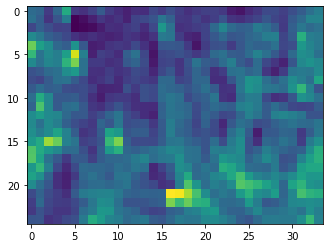

In [15]:
plt.imshow(B2_image)

In [19]:
targetSize = (50,50)

B5_Matrix = cv2.resize(B2_image,targetSize,interpolation=cv2.INTER_NEAREST)

In [20]:
#Date picker 
dateBox = widgets.DatePicker(
    description='',
    disabled=False
)

#Map
mapWidget = widgets.Output()
    
#labels
step1 = widgets.Label('Step 1: Select the date')
step2 = widgets.Label('Step 2: Select Region from the map')
step3 = widgets.Label('Step 3: Load model')
step4 = widgets.Label('Step 4: Estimate yield')
estimate_yield_debug = widgets.Label('')

#Buttons
getROI = widgets.Button(description='Ok')
estimate_yield_Btn = widgets.Button(description='Estimate yield')
loadModel_Btn = widgets.Button(description='Load model')

#Progress bar
progressBar = widgets.IntProgress(
    value=0,
    min=0,
    max=19,
    step=1,
    description='',
    bar_style='info', 
    orientation='horizontal'
)

#Text Area
estimate_yield_Out = widgets.Textarea(
    value='',
    placeholder='',
    description='',
    disabled=True,
    layout={'height': '300px'}
)

#Display prediction image (Matplotlib plot)
estimate_yield_plot = widgets.Output()

NameError: name 'widgets' is not defined